DAT340, Assignment 2

Romain THEODET

### Task 1

Step 1

In [13]:
import pandas as pd

# Read the CSV file.
dataTrain = pd.read_csv("adult_train.csv")
dataTest = pd.read_csv("adult_test.csv")

# Shuffle the dataset.
dataTrainShuffled = dataTrain.sample(frac=1.0, random_state=0)
dataTestShuffled = dataTest.sample(frac=1.0, random_state=0)

# Partition the data into training and test sets
Xtrain = dataTrainShuffled.drop("target", axis=1)
Ytrain = dataTrainShuffled["target"].dropna()
Xtest = dataTestShuffled.drop("target", axis=1)
Ytest = dataTestShuffled["target"].dropna()


Step 2

In [14]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

Xtrain = Xtrain.to_dict("records")
Xtest = Xtest.to_dict("records")

dv = DictVectorizer()
XtrainEnc = dv.fit_transform(Xtrain)
XtestEnc = dv.transform(Xtest)

print("Cross-validation score:", np.mean(cross_val_score(DecisionTreeClassifier(), XtrainEnc, Ytrain)))

Cross-validation score: 0.8189553985961172


Step 3

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pipeline = make_pipeline(
    DictVectorizer(),
    DecisionTreeClassifier()
)

model = pipeline.fit(Xtrain, Ytrain)
print("Cross-validation score:", np.mean(cross_val_score(model, Xtrain, Ytrain)))

Cross-validation score: 0.8187404297434238


### Task 2

Decision tree classifier

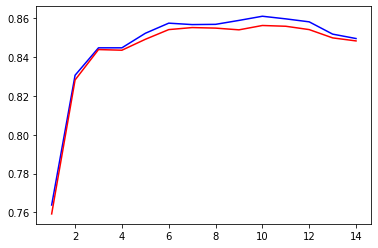

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

scoresTest = []
scores = []
depths = []

for depth in range(1, 15):
    pipeline = make_pipeline(
        DictVectorizer(),
        DecisionTreeClassifier(max_depth=depth)
    )

    model = pipeline.fit(Xtrain, Ytrain)
    Yguess = model.predict(Xtest)
    scores.append(np.mean(cross_val_score(model, Xtrain, Ytrain)))
    scoresTest.append(accuracy_score(Ytest, Yguess))
    depths.append(depth)

plt.plot(depths, scoresTest, color="blue", label="Test accuracy")
plt.plot(depths, scores, color="red", label="Cross-validation accuracy")

Random forest classifier

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
30
40
50
60
70
80
90
100
125
150
175
200
225
250
275
300


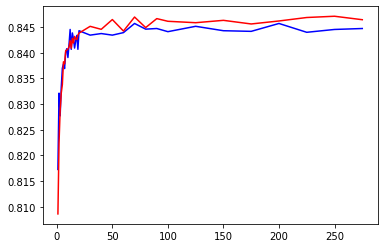

In [15]:
from sklearn.ensemble import RandomForestClassifier

scoresTest = []
scores = []
depths = []

depth = 1
while depth < 300:
    nbJobs = None if depth < 20 else -1
    pipeline = make_pipeline(
        DictVectorizer(),
        RandomForestClassifier(n_estimators=depth, n_jobs=nbJobs)
    )

    model = pipeline.fit(Xtrain, Ytrain)
    Yguess = model.predict(Xtest)
    scores.append(np.mean(cross_val_score(model, Xtrain, Ytrain)))
    scoresTest.append(accuracy_score(Ytest, Yguess))
    depths.append(depth)

    if depth < 20:
        depth += 1
    elif depth < 100:
        depth += 10
    else:
        depth += 25

    print(depth)

plt.plot(depths, scoresTest, color="blue", label="Test accuracy")
plt.plot(depths, scores, color="red", label="Cross-validation accuracy")

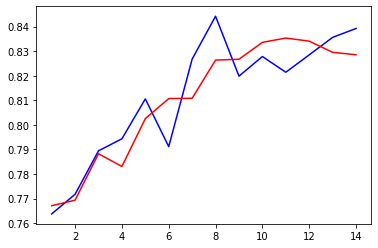

In [16]:
scoresTest = []
scores = []
depths = []

for depth in range(1, 15):
    pipeline = make_pipeline(
        DictVectorizer(),
        RandomForestClassifier(n_estimators=1, max_depth=depth)
    )

    model = pipeline.fit(Xtrain, Ytrain)
    Yguess = model.predict(Xtest)
    scores.append(np.mean(cross_val_score(model, Xtrain, Ytrain)))
    scoresTest.append(accuracy_score(Ytest, Yguess))
    depths.append(depth)

plt.plot(depths, scoresTest, color="blue", label="Test accuracy")
plt.plot(depths, scores, color="red", label="Cross-validation accuracy")

- The curve for a decision tree with an ensemble size of 1 is clearly different from the one for a random forest.
An explanation could be that random forests use a sampling of the training data to train the model, while decision trees use the whole training data.
As such, the decision tree is more prone to overfitting.
- When the ensemble size grows, the accuracy of the model get better and the model converges (around a size of 25).
- The training time gets longer as the forest size grows, but the accuracy still gets better.

### Task 3

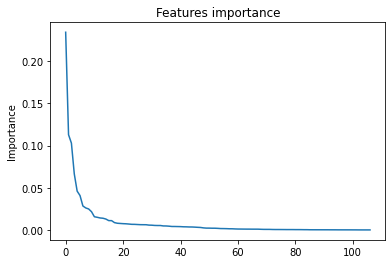

Most important feature: 'age'


In [24]:
pipeline = make_pipeline(
    DictVectorizer(),
    RandomForestClassifier(n_estimators=5, n_jobs=-1)
)

model = pipeline.fit(Xtrain, Ytrain)
features = model.steps[0][1].feature_names_
importances = model.steps[1][1].feature_importances_
sortIndices = np.argsort(importances)[::-1]
importancesSorted = [importances[i] for i in sortIndices]
featuresSorted = [features[i] for i in sortIndices]

plt.title("Features importance")
plt.plot(range(len(sortIndices)), importancesSorted)
plt.ylabel("Importance")
plt.show()

print(f"Most important feature: '{featuresSorted[0]}'")

Based on the work of Parr et al., another way to compute the importance of a feature would simply be to drop the feature (by removing a column)
and recompute the accuracy of the model on the remaining features to determine the importance of this feature on the model.
